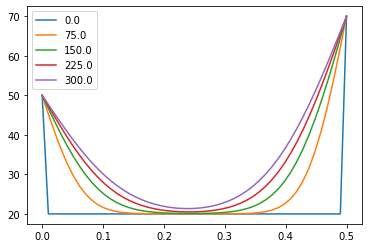

In [1]:
#1D нестационар неявный ГУ-1
import numpy as np
import matplotlib.pyplot as plt

T1 = 50
T2 = 70
Tinit = 20
L = 0.5
t = 5*60 

M = 50 
N = 500 

lamda = 50
ro = 7000
c  = 400
qv = 1000
a = lamda/(c*ro)

dx = L/(M-1)
dt = t/(N-1)

tau = a*dt/(dx**2)

T = np.zeros((N,M))
A = np.zeros((M,M))
B = np.zeros(M)

T[0,:] = Tinit
T[:,0] = T1
T[:,M-1] = T2

for i in range(N-1):
    for m in range(1,M-1):
        A[m,m] = -(1+2*tau)
        A[m,m-1] = tau
        A[m,m+1] = tau
        B[m] = -T[i,m] - tau*qv*dx**2/lamda
    
    A[0,0] = 1
    B[0] = T1
    A[M-1,M-1] = 1
    B[M-1] = T2
    
    T[i+1] = np.linalg.solve(A,B)

X = [i*dx for i in range(M)]
plt.plot(X,T[0,:],               label = round(0         *dt,1))
plt.plot(X,T[int(0.25*(N-1)),:], label = round(0.25*(N-1)*dt,1))
plt.plot(X,T[int(0.5 *(N-1)),:], label = round(0.5 *(N-1)*dt,1))
plt.plot(X,T[int(0.75*(N-1)),:], label = round(0.75*(N-1)*dt,1))
plt.plot(X,T[N-1,:],             label = round(     (N-1)*dt,1))
plt.legend()
plt.show()

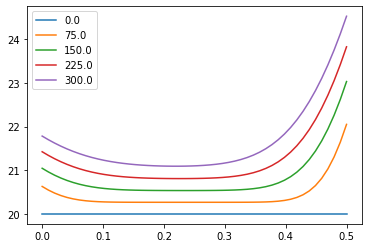

In [2]:
#1D нестационар неявный ГУ-3

import numpy as np
import matplotlib.pyplot as plt

Tf1 = 50
alpha1 = 15

Tf2 = 70
alpha2 = 45

Tinit = 20
L = 0.5
t = 5*60

M = 50
N = 500

lamda = 50
ro = 7000
c  = 400
qv = 10000
a = lamda/(c*ro)

dx = L/(M-1)
dt = t/(N-1)

tau = a*dt/(dx**2)

T = np.zeros((N,M))
A = np.zeros((M,M))
B = np.zeros(M)

T[0,:] = Tinit

for i in range(N-1):
    for m in range(1,M-1):
        A[m,m] = -(1+2*tau)
        A[m,m-1] = tau
        A[m,m+1] = tau
        B[m] = -T[i,m]-tau*qv*dx**2/lamda
    
    A[0,0] = -(1+2*tau+2*tau*alpha1*dx/lamda)
    A[0,1] = 2*tau
    B[0] = -2*tau*alpha1*dx*Tf1/lamda - tau*qv*dx**2/lamda - T[i,0]

    A[M-1,M-1] = -(1+2*tau+2*tau*alpha2*dx/lamda)
    A[M-1,M-2] = 2*tau
    B[M-1] = -2*tau*alpha2*dx*Tf2/lamda - tau*qv*dx**2/lamda - T[i,M-1]
    
    T[i+1] = np.linalg.solve(A,B)

X = [i*dx for i in range(M)]
plt.plot(X,T[0,:],               label = round(0         *dt,1))
plt.plot(X,T[int(0.25*(N-1)),:], label = round(0.25*(N-1)*dt,1))
plt.plot(X,T[int(0.5 *(N-1)),:], label = round(0.5 *(N-1)*dt,1))
plt.plot(X,T[int(0.75*(N-1)),:], label = round(0.75*(N-1)*dt,1))
plt.plot(X,T[N-1,:],             label = round(     (N-1)*dt,1))
plt.legend()
plt.show()